In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('hyderabad.csv')
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Addagutta,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Adibatla,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Alkapuri,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ameerpet,2 BHK,1200,2.0,1.0,51.00


In [3]:
df.shape

(1402, 7)

In [4]:
df.isnull().sum()

area_type      0
location       0
size           1
total_sqft     0
bath          11
balcony       71
price          0
dtype: int64

In [5]:
df.dropna(subset=['size'],inplace=True)

In [6]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft     0
bath          10
balcony       70
price          0
dtype: int64

In [7]:
for i in df.columns:
    print(f' feature <{i}> has {df[i].unique()} features')
    print('='*100)

 feature <area_type> has ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] features
 feature <location> has ['Addagutta' 'Adibatla' 'Alkapuri' 'Ambedkar Nagar' 'Ameerpet' 'Aminpur'
 'Anjaiah Nagar' 'Anjaneya Nagar' 'Appa Junction' 'Arunodaya Colony'
 'Attapur' 'Ayyappa Society' 'Bachupally' 'Balaji Hills Colony'
 'Bandam Kommu' 'Bandlaguda' 'Bowenpally' 'Bangalore Highway'
 'Banjara Hills' 'Beeramguda' 'Begumpet' 'Boduppal' 'Camelot Layout'
 'Chandanagar' 'D.D. Colony' 'Devender Colony' 'Dilsukh Nagar'
 'Dullapally' 'Film Nagar' 'Financial District' 'Friends Colony'
 'Gachibowli' 'Gajulramaram' 'Gandhi Nagar' 'Gangaram' 'Gopanpally'
 'Hafeezpet' 'Hanuman Nagar' 'Harithavanam Colony' 'Hi-Tech City'
 'Himayat Nagar' 'HMT Swarnapuri Colony' 'Huda Layout' 'Hyder Nagar'
 'Hydershakote' 'Indira Nagar' 'Isnapur' 'Jagruthi Colony'
 'Jai Bharat Nagar' 'Janardana Hills' 'Jubilee Hills' 'Kapra'
 'Kavuri Hills' 'Khairatabad' 'Khajaguda' 'Kistareddypet' 'Kokapet'
 'Kollur' 'Koll

In [8]:
for i in df.columns:
    print(f' feature {i} has {df[i].value_counts()}')
    print('='*100)
    

 feature area_type has Super built-up  Area    929
Built-up  Area          259
Plot  Area              202
Carpet  Area             11
Name: area_type, dtype: int64
 feature location has Hi-Tech City            10
Adibatla                10
LB Nagar                10
Madinaguda              10
Jubilee Hills           10
                        ..
Upparpally               8
Whitefield               8
Vasanth Nagar Colony     8
bowenpally               3
Bowenpally               2
Name: location, Length: 146, dtype: int64
 feature size has 2 BHK        548
3 BHK        460
4 Bedroom     85
1 BHK         59
4 BHK         54
3 Bedroom     54
2 Bedroom     30
5 Bedroom     26
6 Bedroom     25
8 Bedroom     12
1 Bedroom     11
9 Bedroom      8
7 Bedroom      8
5 BHK          7
6 BHK          4
7 BHK          4
1 RK           3
9 BHK          2
11 BHK         1
Name: size, dtype: int64
 feature total_sqft has 1200    88
1500    29
1100    19
1000    18
600     16
        ..
1234     1
2160   

In [9]:
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df.select_dtypes(include=['int64','float64']).columns
print(f'num_features are {num_vars} \n\ncat_features are {cat_vars}')

num_features are Index(['bath', 'balcony', 'price'], dtype='object') 

cat_features are Index(['area_type', 'location', 'size', 'total_sqft'], dtype='object')


In [10]:
mean_bath = df['bath'].mean()
mean_balcony = df['balcony'].mean()

median_bath = df['bath'].median()
median_balcony = df['balcony'].median()

In [11]:
print(f'median bath value is {median_bath}\n\nmedian balcony value is {median_balcony}')

median bath value is 2.0

median balcony value is 2.0


In [12]:
def impute(df,var,mean_var,median_var):
    df[var+'_mean'] = df[var].fillna(mean_var)
    df[var+'_median'] = df[var].fillna(median_var)

In [13]:
impute(df,'balcony',mean_balcony,median_balcony)
impute(df,'bath',mean_bath,median_bath)

In [14]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,balcony_mean,balcony_median,bath_mean,bath_median
0,Super built-up Area,Addagutta,2 BHK,1056,2.0,1.0,39.07,1.0,1.0,2.0,2.0
1,Plot Area,Adibatla,4 Bedroom,2600,5.0,3.0,120.00,3.0,3.0,5.0,5.0
2,Built-up Area,Alkapuri,3 BHK,1440,2.0,3.0,62.00,3.0,3.0,2.0,2.0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,3.0,1.0,95.00,1.0,1.0,3.0,3.0
4,Super built-up Area,Ameerpet,2 BHK,1200,2.0,1.0,51.00,1.0,1.0,2.0,2.0


In [15]:
df.isnull().sum()

area_type          0
location           0
size               0
total_sqft         0
bath              10
balcony           70
price              0
balcony_mean       0
balcony_median     0
bath_mean          0
bath_median        0
dtype: int64

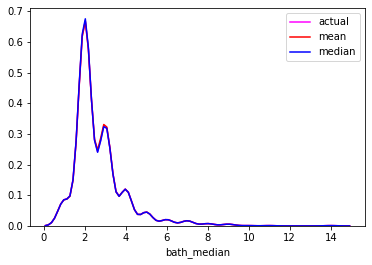

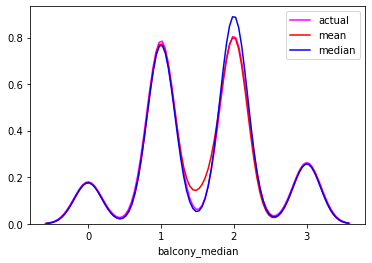

In [16]:
normal_list = ['bath','balcony']
mean_list = ['bath_mean','balcony_mean']
median_list = ['bath_median','balcony_median']
for i,j,k in zip(normal_list,mean_list,median_list):
    sn.distplot(df[i],label = 'actual',hist = False,kde = True,color='magenta')
    sn.distplot(df[j],label = 'mean',hist = False,kde = True,color='red')
    sn.distplot(df[k],label='median',hist=False,kde=True,color='blue')
    plt.legend()
    plt.show()

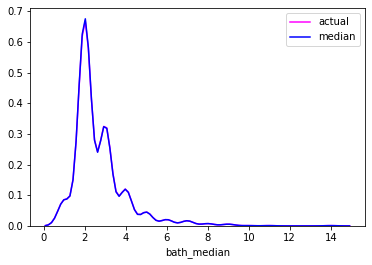

In [17]:
sn.distplot(df['bath'],hist=False,kde = True,label = 'actual',color = 'magenta')
sn.distplot(df['bath_median'],hist=False,kde = True,label = 'median',color = 'blue')
plt.legend()
plt.show()

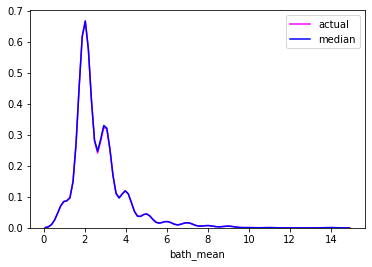

In [18]:
sn.distplot(df['bath'],hist=False,kde = True,label = 'actual',color = 'magenta')
sn.distplot(df['bath_mean'],hist=False,kde = True,label = 'median',color = 'blue')
plt.legend()
plt.show()

**from the above figures we can see that bathroom's null values can be filled with mean,and balcony with median**

In [19]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price', 'balcony_mean', 'balcony_median', 'bath_mean', 'bath_median'],
      dtype='object')

In [20]:
df = df.drop(['bath_median','balcony_mean','bath', 'balcony'],axis = 1)
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0


In [21]:
df.isnull().sum()

area_type         0
location          0
size              0
total_sqft        0
price             0
balcony_median    0
bath_mean         0
dtype: int64

In [22]:
pd.set_option('display.max_rows',None)
for i in cat_vars:
    print(f' feature {i} has {df[i].unique()}')
    print('='*100)

 feature area_type has ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
 feature location has ['Addagutta' 'Adibatla' 'Alkapuri' 'Ambedkar Nagar' 'Ameerpet' 'Aminpur'
 'Anjaiah Nagar' 'Anjaneya Nagar' 'Appa Junction' 'Arunodaya Colony'
 'Attapur' 'Ayyappa Society' 'Bachupally' 'Balaji Hills Colony'
 'Bandam Kommu' 'Bandlaguda' 'Bowenpally' 'Bangalore Highway'
 'Banjara Hills' 'Beeramguda' 'Begumpet' 'Boduppal' 'Camelot Layout'
 'Chandanagar' 'D.D. Colony' 'Devender Colony' 'Dilsukh Nagar'
 'Dullapally' 'Film Nagar' 'Financial District' 'Friends Colony'
 'Gachibowli' 'Gajulramaram' 'Gandhi Nagar' 'Gangaram' 'Gopanpally'
 'Hafeezpet' 'Hanuman Nagar' 'Harithavanam Colony' 'Hi-Tech City'
 'Himayat Nagar' 'HMT Swarnapuri Colony' 'Huda Layout' 'Hyder Nagar'
 'Hydershakote' 'Indira Nagar' 'Isnapur' 'Jagruthi Colony'
 'Jai Bharat Nagar' 'Janardana Hills' 'Jubilee Hills' 'Kapra'
 'Kavuri Hills' 'Khairatabad' 'Khajaguda' 'Kistareddypet' 'Kokapet'
 'Kollur' 'Kollur Village' '

In [23]:
pd.set_option('display.max_rows',None)
for i in cat_vars:
    print(f' feature {i} has {df[i].value_counts()}')
    print('='*100)

 feature area_type has Super built-up  Area    929
Built-up  Area          259
Plot  Area              202
Carpet  Area             11
Name: area_type, dtype: int64
 feature location has Hi-Tech City                10
Adibatla                    10
LB Nagar                    10
Madinaguda                  10
Jubilee Hills               10
Moti Nagar                  10
OU Colony                   10
Hanuman Nagar               10
Bandlaguda                  10
KPHB                        10
Kollur                      10
Kundanbagh                  10
Hyder Nagar                 10
Moosapet                    10
Chandanagar                 10
Kollur Village              10
Attapur                     10
Gopanpally                  10
Boduppal                    10
Bandam Kommu                10
Mythri Nagar                10
Balaji Hills Colony         10
Appa Junction               10
Nagaram                     10
Kothapet                    10
Jai Bharat Nagar            10
Nallaga

In [24]:
num = df['total_sqft'].str.split('-',expand = True)
df['first_val'] = num[0]
df['second_val'] = num[1]
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,None
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,None
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,None
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,None
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,None


In [25]:
df['second_val'] = df['second_val'].replace('None','0')

In [26]:
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,None
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,None
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,None
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,None
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,None


In [27]:
df['second_val'].fillna(0,inplace = True)

In [28]:
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0


In [29]:
df['second_val'].value_counts()

0        1376
 1130       1
 1540       1
 5249       1
 1884       1
 645        1
 1093       1
 6640       1
 1145       1
 1285       1
 665        1
 1340       1
 6800       1
 1105       1
 2850       1
 1195       1
 1116       1
 5091       1
 1740       1
 3410       1
 3450       1
 666        1
 1440       1
 5002       1
 8156       1
 1455       1
Name: second_val, dtype: int64

In [30]:
pd.set_option('display.max_rows',None)
df['first_val'].value_counts()

1200              88
1500              29
1100              19
1000              18
600               16
1600              15
1800              13
2400              13
950               12
1350              12
1150              12
1075              11
1300              10
1050              10
1020              10
1260              10
1250               9
1400               9
1060               8
1450               8
1140               8
2000               8
1070               8
900                8
3000               8
1175               7
1180               7
1170               7
1185               7
1128               7
1225               6
1025               6
1550               6
850                6
1240               6
1280               6
700                6
500                6
5000               5
1160               5
1560               5
1325               5
1210               5
1475               5
1630               5
1464               5
1125               5
1535         

In [31]:
aplha_list = ['S','A','P']
j = 0
for i in range(len(df['first_val'])):
    if i in ['S','A','P']:
        num = df[i].str.split(i,expand=True)
        df[i+'_edited'] = num[0]
    

In [32]:
num = df['first_val'].str.split('A',expand=True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

1200              88
1500              29
1100              19
1000              18
600               16
1600              15
2400              13
1800              13
1150              12
1350              12
950               12
1075              11
1300              10
1020              10
1050              10
1260              10
1400               9
1250               9
1450               8
1060               8
1070               8
2000               8
3000               8
1140               8
900                8
1170               7
1175               7
1128               7
1180               7
1185               7
850                6
1225               6
1025               6
700                6
500                6
1550               6
1240               6
1280               6
1464               5
1125               5
1580               5
525                5
1475               5
1560               5
1210               5
1630               5
1325               5
1090         

In [33]:
num = df['edited_A_val'].str.split('S',expand = True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

1200         88
1500         29
1100         20
1000         19
600          16
1600         15
2400         13
1800         13
950          12
1150         12
1350         12
1075         11
1050         10
1260         10
1300         10
1020         10
1400          9
1250          9
1450          8
1140          8
900           8
3000          8
1060          8
2000          8
1070          8
1185          7
1175          7
1170          7
1180          7
1128          7
1240          6
1550          6
850           6
500           6
1025          6
1225          6
1280          6
700           6
1535          5
1540          5
1580          5
1160          5
1210          5
1125          5
1464          5
1090          5
5000          5
525           5
1475          5
1325          5
1630          5
1560          5
1282          4
3600          4
630           4
1220          4
1425          4
1590          4
1120          4
1665          4
1035          4
1440          4
1875    

In [34]:
num = df['edited_A_val'].str.split('P',expand = True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

1200       88
1500       29
1100       20
1000       19
600        16
1600       15
2400       13
1800       13
950        12
1350       12
1150       12
1075       11
1300       10
1020       10
1050       10
1260       10
1400        9
1250        9
1450        8
1060        8
1070        8
2000        8
3000        8
1140        8
900         8
1170        7
1185        7
1180        7
1128        7
1175        7
1225        6
500         6
850         6
1025        6
700         6
1240        6
1550        6
1280        6
1560        5
5000        5
525         5
1535        5
1210        5
1630        5
1090        5
1160        5
1580        5
1540        5
1125        5
1464        5
1325        5
1475        5
630         4
1425        4
1220        4
1590        4
1080        4
1120        4
1640        4
1194        4
1282        4
1246        4
3600        4
1035        4
1665        4
1440        4
1750        4
1875        4
1650        4
1460        4
1005        4
883   

In [35]:
num = df['edited_A_val'].str.split('.',expand = True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

1200     88
1500     29
1100     20
1000     19
600      16
1600     15
2400     13
1800     13
1350     12
1150     12
950      12
1075     11
1050     10
1300     10
1020     10
1260     10
1250      9
1400      9
1140      8
3000      8
1450      8
900       8
2000      8
1070      8
1060      8
1128      7
1170      7
1175      7
1180      7
1185      7
500       6
850       6
1240      6
1550      6
1225      6
1025      6
700       6
1280      6
1475      5
1210      5
1325      5
1560      5
1464      5
5000      5
1125      5
1540      5
1580      5
1160      5
525       5
1090      5
1630      5
1535      5
3600      4
1875      4
1120      4
1640      4
1750      4
1330      4
1440      4
1425      4
1665      4
1590      4
1035      4
1194      4
1220      4
883       4
1190      4
1650      4
1282      4
1460      4
1005      4
1246      4
1080      4
630       4
1320      3
1390      3
710       3
3500      3
650       3
1113      3
2500      3
2225      3
2250      3
1192

In [36]:
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val,edited_A_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0,1440
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0,1521
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0,1200


In [37]:
df.columns = ['area_type','location','size','total_Sqft','price','balcony','bathroom','remove','second','first']

In [38]:
df.head(2)

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600


In [39]:
pd.set_option('display.max_rows',None)
df['remove'].value_counts()

1200              88
1500              29
1100              19
1000              18
600               16
1600              15
1800              13
2400              13
950               12
1350              12
1150              12
1075              11
1300              10
1050              10
1020              10
1260              10
1250               9
1400               9
1060               8
1450               8
1140               8
2000               8
1070               8
900                8
3000               8
1175               7
1180               7
1170               7
1185               7
1128               7
1225               6
1025               6
1550               6
850                6
1240               6
1280               6
700                6
500                6
5000               5
1160               5
1560               5
1325               5
1210               5
1475               5
1630               5
1464               5
1125               5
1535         

In [40]:
df['second'].value_counts()

0        1376
 1130       1
 1540       1
 5249       1
 1884       1
 645        1
 1093       1
 6640       1
 1145       1
 1285       1
 665        1
 1340       1
 6800       1
 1105       1
 2850       1
 1195       1
 1116       1
 5091       1
 1740       1
 3410       1
 3450       1
 666        1
 1440       1
 5002       1
 8156       1
 1455       1
Name: second, dtype: int64

In [41]:
data = df.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1401 non-null   object 
 1   location    1401 non-null   object 
 2   size        1401 non-null   object 
 3   total_Sqft  1401 non-null   object 
 4   price       1401 non-null   float64
 5   balcony     1401 non-null   float64
 6   bathroom    1401 non-null   float64
 7   remove      1401 non-null   object 
 8   second      1401 non-null   object 
 9   first       1401 non-null   object 
dtypes: float64(3), object(7)
memory usage: 120.4+ KB


In [43]:
data['second'] = data['second'].astype('float64')
data['first'] = data['first'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1401 non-null   object 
 1   location    1401 non-null   object 
 2   size        1401 non-null   object 
 3   total_Sqft  1401 non-null   object 
 4   price       1401 non-null   float64
 5   balcony     1401 non-null   float64
 6   bathroom    1401 non-null   float64
 7   remove      1401 non-null   object 
 8   second      1401 non-null   float64
 9   first       1401 non-null   float64
dtypes: float64(5), object(5)
memory usage: 120.4+ KB


In [44]:
temp = data.loc[data['second']!=0]
temp

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
30,Super built-up Area,Friends Colony,4 BHK,2100 - 2850,186.000,0.0,4.000000,2100,2850.0,2100.0
56,Built-up Area,Kokapet,4 Bedroom,3010 - 3410,192.000,2.0,2.687994,3010,3410.0,3010.0
81,Built-up Area,Medipally,4 Bedroom,2957 - 3450,224.500,2.0,2.687994,2957,3450.0,2957.0
122,Super built-up Area,Secretariat Colony,4 BHK,3067 - 8156,477.000,0.0,4.000000,3067,8156.0,3067.0
137,Super built-up Area,Upparpally,2 BHK,1042 - 1105,54.005,0.0,2.000000,1042,1105.0,1042.0
165,Super built-up Area,Begumpet,2 BHK,1145 - 1340,43.490,0.0,2.000000,1145,1340.0,1145.0
188,Super built-up Area,Hyder Nagar,2 BHK,1015 - 1540,56.800,0.0,2.000000,1015,1540.0,1015.0
224,Super built-up Area,Matrusri Nagar,3 BHK,1520 - 1740,74.820,2.0,2.687994,1520,1740.0,1520.0
549,Super built-up Area,Rajendra Nagar,2 BHK,1195 - 1440,63.770,0.0,2.000000,1195,1440.0,1195.0
661,Super built-up Area,Mehdipatnam,2 BHK,1120 - 1145,48.130,0.0,2.000000,1120,1145.0,1120.0


In [45]:
temp['first'] = (temp['first']+temp['second'])*0.5

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
use = temp['first']

In [47]:
use = np.array(use)

In [48]:
df.head()

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0,1440
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0,1521
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0,1200


In [49]:
data['total_Sqft'] = df['first']

In [50]:
data.head()

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0.0,1056.0
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0.0,2600.0
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0.0,1440.0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0.0,1521.0
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0.0,1200.0


In [51]:
df.head()

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0,1440
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0,1521
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0,1200


In [52]:
data = data.drop(['area_type','total_Sqft','second'],axis = 1)
data.head()

,location,size,price,balcony,bathroom,remove,first
0,Addagutta,2 BHK,39.07,1.0,2.0,1056,1056.0
1,Adibatla,4 Bedroom,120.00,3.0,5.0,2600,2600.0
2,Alkapuri,3 BHK,62.00,3.0,2.0,1440,1440.0
3,Ambedkar Nagar,3 BHK,95.00,1.0,3.0,1521,1521.0
4,Ameerpet,2 BHK,51.00,1.0,2.0,1200,1200.0


In [53]:
data = data.drop(['remove'],axis = 1)
data.head()

,location,size,price,balcony,bathroom,first
0,Addagutta,2 BHK,39.07,1.0,2.0,1056.0
1,Adibatla,4 Bedroom,120.00,3.0,5.0,2600.0
2,Alkapuri,3 BHK,62.00,3.0,2.0,1440.0
3,Ambedkar Nagar,3 BHK,95.00,1.0,3.0,1521.0
4,Ameerpet,2 BHK,51.00,1.0,2.0,1200.0


In [54]:
cat_vars = data.select_dtypes(include=['object']).columns
num_vars = data.select_dtypes(include=['int64','float64']).columns

In [55]:
print(f' num_vars are : {num_vars}\n\ncat_vars are {cat_vars}')

 num_vars are : Index(['price', 'balcony', 'bathroom', 'first'], dtype='object')

cat_vars are Index(['location', 'size'], dtype='object')


In [56]:
pd.set_option('display.max_rows',None)
data['size'].value_counts()

2 BHK        548
3 BHK        460
4 Bedroom     85
1 BHK         59
4 BHK         54
3 Bedroom     54
2 Bedroom     30
5 Bedroom     26
6 Bedroom     25
8 Bedroom     12
1 Bedroom     11
9 Bedroom      8
7 Bedroom      8
5 BHK          7
6 BHK          4
7 BHK          4
1 RK           3
9 BHK          2
11 BHK         1
Name: size, dtype: int64

In [57]:
num = data['size'].str.split('B',expand=True)
data['size'] = num[0]
data.head()

,location,size,price,balcony,bathroom,first
0,Addagutta,2,39.07,1.0,2.0,1056.0
1,Adibatla,4,120.00,3.0,5.0,2600.0
2,Alkapuri,3,62.00,3.0,2.0,1440.0
3,Ambedkar Nagar,3,95.00,1.0,3.0,1521.0
4,Ameerpet,2,51.00,1.0,2.0,1200.0


In [58]:
data['size'].value_counts()

2       578
3       514
4       139
1        70
5        33
6        29
8        12
7        12
9        10
1 RK      3
11        1
Name: size, dtype: int64

In [59]:
num = data['size'].str.split('R',expand=True)
data['size'] = num[0]
data.head()

,location,size,price,balcony,bathroom,first
0,Addagutta,2,39.07,1.0,2.0,1056.0
1,Adibatla,4,120.00,3.0,5.0,2600.0
2,Alkapuri,3,62.00,3.0,2.0,1440.0
3,Ambedkar Nagar,3,95.00,1.0,3.0,1521.0
4,Ameerpet,2,51.00,1.0,2.0,1200.0


In [60]:
data['size'].value_counts()

2      578
3      514
4      139
1       73
5       33
6       29
8       12
7       12
9       10
11       1
Name: size, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1401 non-null   object 
 1   size      1401 non-null   object 
 2   price     1401 non-null   float64
 3   balcony   1401 non-null   float64
 4   bathroom  1401 non-null   float64
 5   first     1401 non-null   float64
dtypes: float64(4), object(2)
memory usage: 76.6+ KB


In [62]:
data['size'] = data['size'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1401 non-null   object 
 1   size      1401 non-null   int64  
 2   price     1401 non-null   float64
 3   balcony   1401 non-null   float64
 4   bathroom  1401 non-null   float64
 5   first     1401 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 76.6+ KB


In [63]:
cat_vars = cat_vars[0:1]
cat_vars

Index(['location'], dtype='object')

In [64]:
df.groupby(['location'])['price'].mean()

location
Addagutta                   172.480000
Adibatla                     78.789000
Alkapuri                     61.279000
Ambedkar Nagar               87.323000
Ameerpet                    100.393000
Aminpur                     136.631000
Anjaiah Nagar               146.334000
Anjaneya Nagar              140.525000
Appa Junction               208.375000
Arunodaya Colony            119.200000
Attapur                      69.290000
Ayyappa Society             121.250000
Bachupally                   78.212000
Balaji Hills Colony         113.665000
Bandam Kommu                144.714000
Bandlaguda                   64.250000
Bangalore Highway            91.500000
Banjara Hills               104.603000
Beeramguda                   99.603000
Begumpet                    149.155500
Boduppal                    215.188000
Bowenpally                   99.250000
Camelot Layout              129.719000
Chandanagar                 134.655000
D.D. Colony                  65.371000
Devender Colony 

In [65]:
mean_map = []
for i in cat_vars:
    mean_map.append(df.groupby([i])['price'].mean())

In [66]:
mean_map

[location
 Addagutta                   172.480000
 Adibatla                     78.789000
 Alkapuri                     61.279000
 Ambedkar Nagar               87.323000
 Ameerpet                    100.393000
 Aminpur                     136.631000
 Anjaiah Nagar               146.334000
 Anjaneya Nagar              140.525000
 Appa Junction               208.375000
 Arunodaya Colony            119.200000
 Attapur                      69.290000
 Ayyappa Society             121.250000
 Bachupally                   78.212000
 Balaji Hills Colony         113.665000
 Bandam Kommu                144.714000
 Bandlaguda                   64.250000
 Bangalore Highway            91.500000
 Banjara Hills               104.603000
 Beeramguda                   99.603000
 Begumpet                    149.155500
 Boduppal                    215.188000
 Bowenpally                   99.250000
 Camelot Layout              129.719000
 Chandanagar                 134.655000
 D.D. Colony                  

In [67]:
j = 0
for i in cat_vars:
    data[i] = data[i].map(mean_map[j]);j+=1

In [68]:
data.head()

,location,size,price,balcony,bathroom,first
0,172.480,2,39.07,1.0,2.0,1056.0
1,78.789,4,120.00,3.0,5.0,2600.0
2,61.279,3,62.00,3.0,2.0,1440.0
3,87.323,3,95.00,1.0,3.0,1521.0
4,100.393,2,51.00,1.0,2.0,1200.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1401 non-null   float64
 1   size      1401 non-null   int64  
 2   price     1401 non-null   float64
 3   balcony   1401 non-null   float64
 4   bathroom  1401 non-null   float64
 5   first     1401 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 76.6 KB


In [70]:
import scipy.stats as stats

In [71]:
def plots(df,var):
    plt.figure(figsize=(16,9))
    plt.subplot(1,3,1)
    plt.hist(df[var],bins=50,color = 'magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[var],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(y = df[var],color='magenta')
    
    plt.show()

location


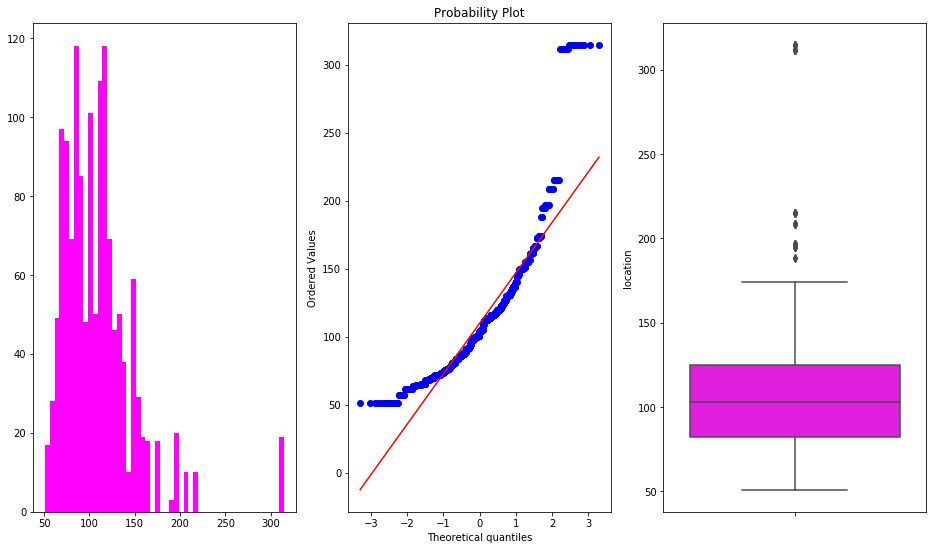

size


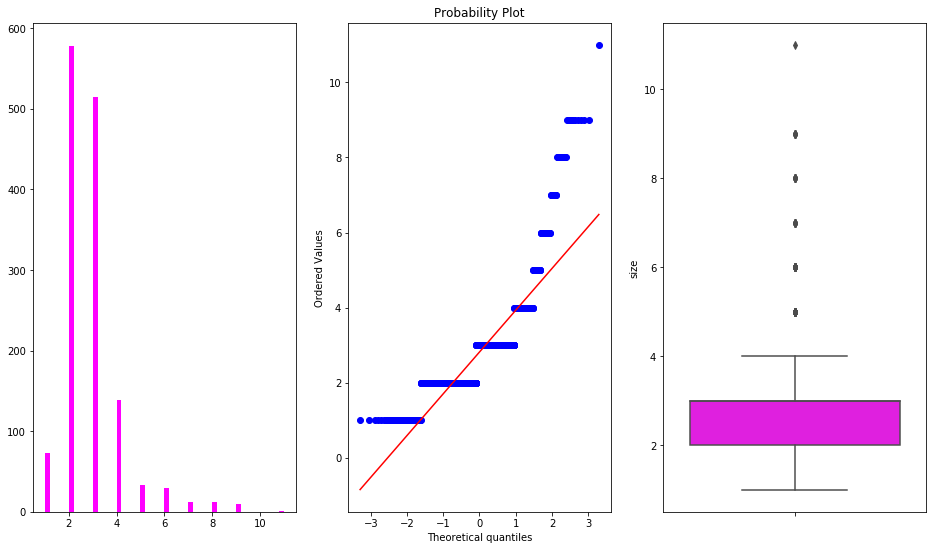

price


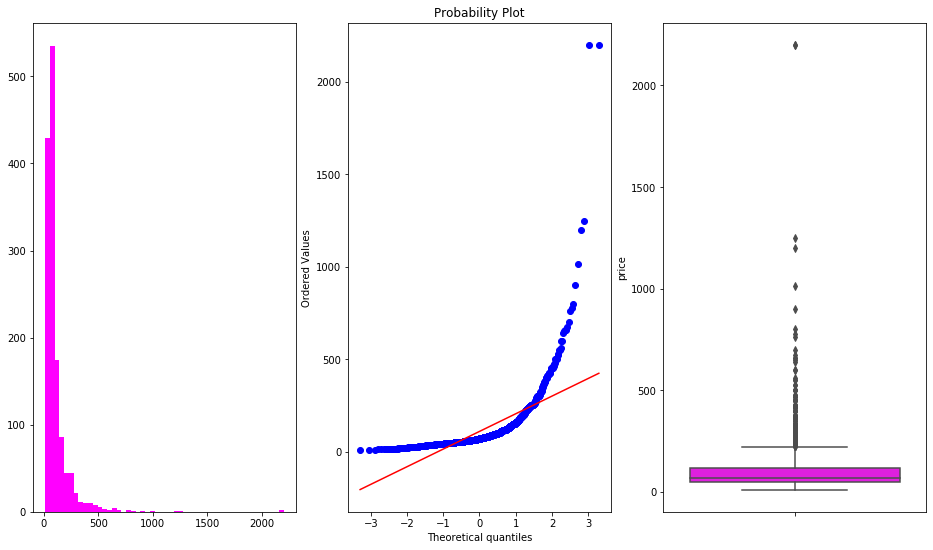

balcony


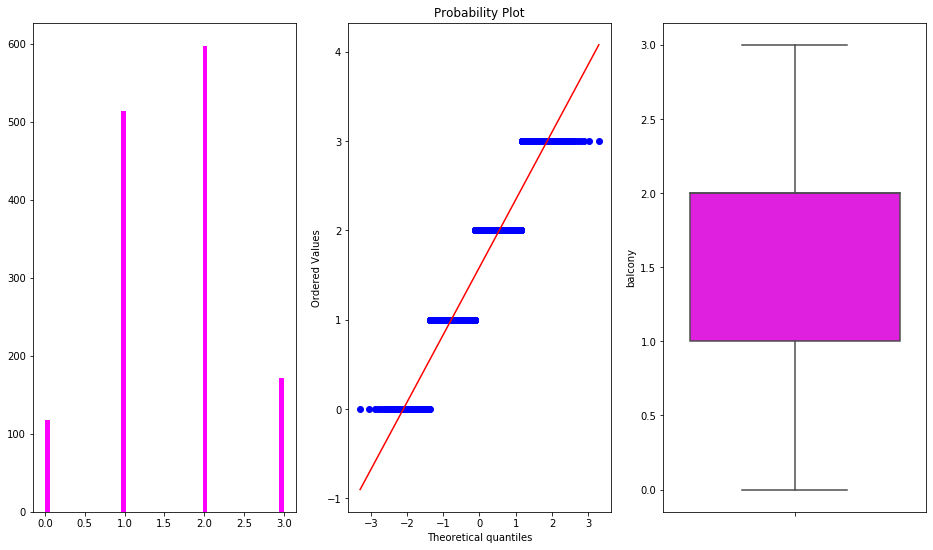

bathroom


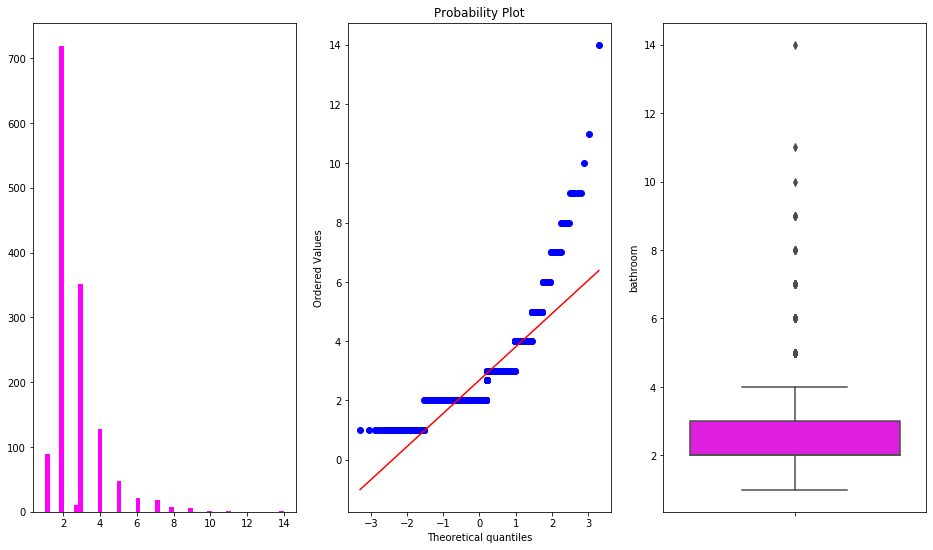

first


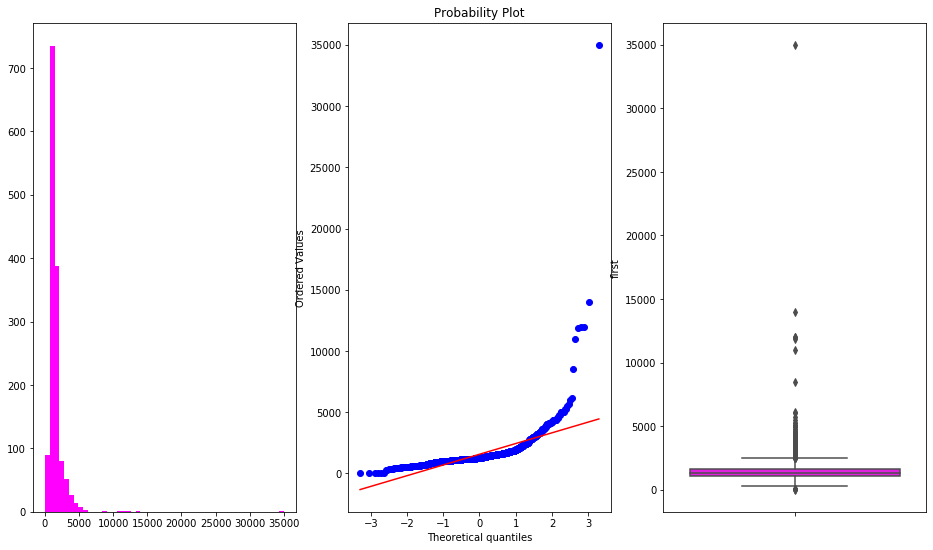

In [72]:
for i in data.columns:
    print(i)
    plots(data,i)
    print('='*100)

In [73]:
data.head()

,location,size,price,balcony,bathroom,first
0,172.480,2,39.07,1.0,2.0,1056.0
1,78.789,4,120.00,3.0,5.0,2600.0
2,61.279,3,62.00,3.0,2.0,1440.0
3,87.323,3,95.00,1.0,3.0,1521.0
4,100.393,2,51.00,1.0,2.0,1200.0


In [74]:
data.columns = ['location','size(bedrooms)','price','balcony','bathroom','total_sqft']

In [75]:
data.head(2)

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1.0,2.0,1056.0
1,78.789,4,120.00,3.0,5.0,2600.0


In [76]:
for i in data.columns:
    print(f' feature {i} has {data[i].value_counts()}')
    print('='*100)

 feature location has 78.789000     10
115.756500    10
115.590000    10
131.982000    10
130.955000    10
68.278000     10
149.155500    10
149.740000    10
117.550000    10
119.200000    10
112.450000    10
136.631000    10
85.893500     10
104.587000    10
104.977000    10
61.279000     10
86.910000     10
74.741000     10
129.825000    10
97.600000     10
106.192000    10
100.300000    10
116.969000    10
115.617000    10
123.539000    10
125.918000    10
99.125000     10
90.570000     10
119.430000    10
115.917000    10
112.171000    10
124.011000    10
109.364000    10
70.673000     10
86.195000     10
99.761000     10
83.739000     10
194.780000    10
90.850000     10
100.393000    10
144.714000    10
103.022000    10
113.665000    10
155.012000    10
85.970000     10
64.827000     10
72.247000     10
112.186500    10
196.797000    10
64.250000     10
166.829000    10
100.580000    10
150.638000    10
154.703000    10
114.725000    10
99.603000     10
68.244000     10
76.006000

In [77]:
data.columns

Index(['location', 'size(bedrooms)', 'price', 'balcony', 'bathroom',
       'total_sqft'],
      dtype='object')

In [78]:
int_inst = ['size(bedrooms)','balcony', 'bathroom']
for i in int_inst:
    data[i] = data[i].astype('int64')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1401 non-null   float64
 1   size(bedrooms)  1401 non-null   int64  
 2   price           1401 non-null   float64
 3   balcony         1401 non-null   int64  
 4   bathroom        1401 non-null   int64  
 5   total_sqft      1401 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 76.6 KB


In [80]:
data['size(bedrooms)'].value_counts()

2     578
3     514
4     139
1      73
5      33
6      29
8      12
7      12
9      10
11      1
Name: size(bedrooms), dtype: int64

In [81]:
data['bathroom'].value_counts()

2     729
3     351
4     127
1      89
5      48
6      22
7      18
8       8
9       6
14      1
11      1
10      1
Name: bathroom, dtype: int64

In [82]:
max_bath = max(data['bathroom'])
min_bath = min(data['bathroom'])
print(f' max_value is {max_bath}\n\n min_value is {min_bath}')

 max_value is 14

 min_value is 1


In [83]:
avg = np.floor((max_bath+min_bath)*0.5)
avg

7.0

In [84]:
data['avg'] = avg

In [85]:
data['bathroom'] = abs(data['bathroom']-data['avg'])

In [86]:
data['bathroom'].value_counts()

5.0    729
4.0    352
3.0    128
6.0     89
2.0     54
1.0     30
0.0     18
7.0      1
Name: bathroom, dtype: int64

In [87]:
data.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft,avg
0,172.480,2,39.07,1,5.0,1056.0,7.0
1,78.789,4,120.00,3,2.0,2600.0,7.0
2,61.279,3,62.00,3,5.0,1440.0,7.0
3,87.323,3,95.00,1,4.0,1521.0,7.0
4,100.393,2,51.00,1,5.0,1200.0,7.0


In [88]:
data = data.drop(['avg'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1401 non-null   float64
 1   size(bedrooms)  1401 non-null   int64  
 2   price           1401 non-null   float64
 3   balcony         1401 non-null   int64  
 4   bathroom        1401 non-null   float64
 5   total_sqft      1401 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 76.6 KB


In [89]:
data['bathroom'] = data['bathroom'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1401 non-null   float64
 1   size(bedrooms)  1401 non-null   int64  
 2   price           1401 non-null   float64
 3   balcony         1401 non-null   int64  
 4   bathroom        1401 non-null   int64  
 5   total_sqft      1401 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 76.6 KB


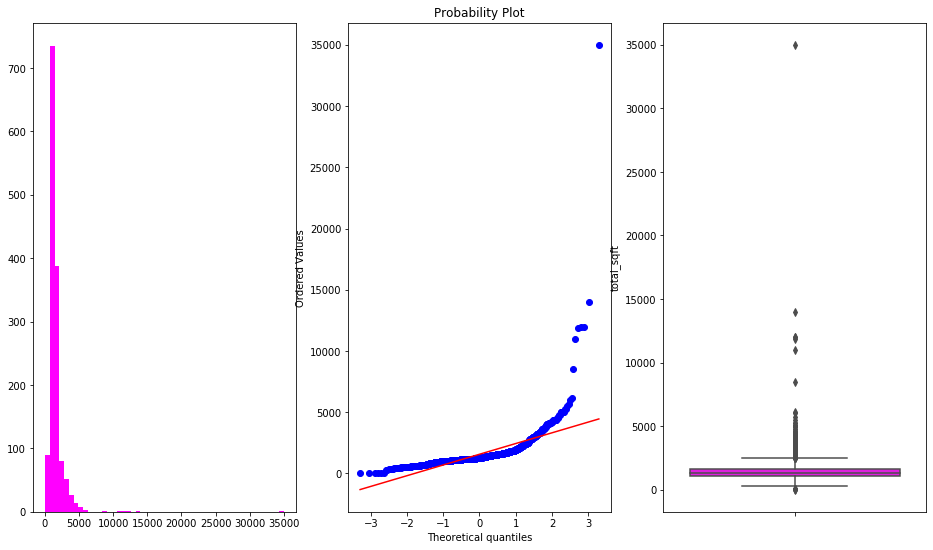

In [90]:
plots(data,'total_sqft')

In [91]:
temp = data.copy()

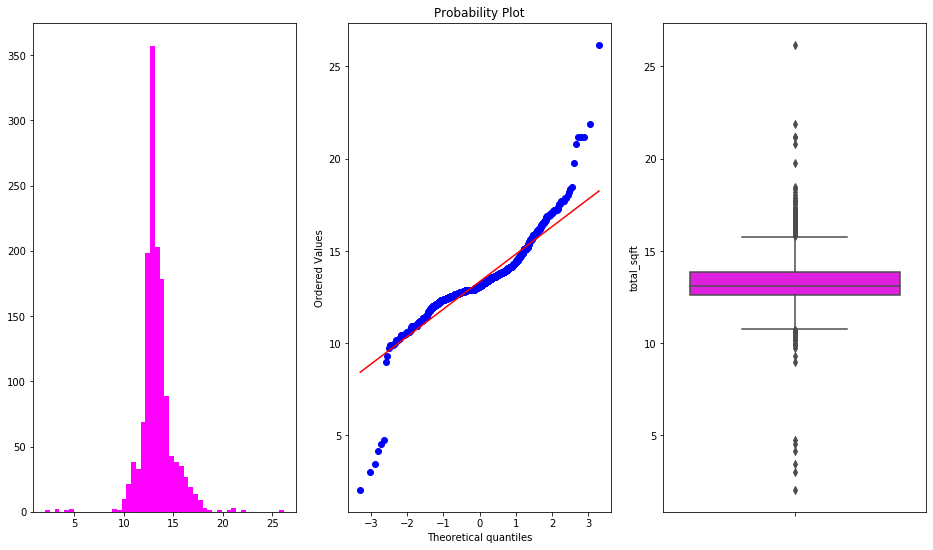

In [92]:
temp['total_sqft'],parameters = stats.boxcox(temp['total_sqft']+1)
plots(temp,'total_sqft')

In [93]:
data.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1,5,1056.0
1,78.789,4,120.00,3,2,2600.0
2,61.279,3,62.00,3,5,1440.0
3,87.323,3,95.00,1,4,1521.0
4,100.393,2,51.00,1,5,1200.0


In [94]:
upper_limit = []
lower_limit = []
for i in data.columns:
    upper_limit.append(data[i].mean() + (data[i].std())*3)
    lower_limit.append(data[i].mean() - (data[i].std())*3)

In [95]:
j = 0
for i in data.columns:
    temp = data[(data[i]>upper_limit[j])|(data[i]<lower_limit[j])];j+=1

In [96]:
temp

,location,size(bedrooms),price,balcony,bathroom,total_sqft
62,196.797000,4,650.0,3,2,5700.0
408,311.855556,7,2200.0,3,1,12000.0
440,146.334000,4,700.0,3,3,11890.0
514,109.364000,4,145.0,2,3,8500.0
605,314.673000,7,2200.0,3,0,12000.0
674,119.430000,3,130.0,3,4,35000.0
810,166.829000,4,80.0,1,3,10961.0
1090,130.955000,4,560.0,2,3,6136.0
1153,140.525000,4,400.0,3,2,6000.0
1234,166.829000,4,800.0,2,4,14000.0


In [97]:
data.shape

(1401, 6)

In [99]:
j = 0
for i in data.columns:
    data = data[(data[i]<upper_limit[j])&(data[i]>lower_limit[j])];j+=1

In [100]:
data.shape

(1322, 6)

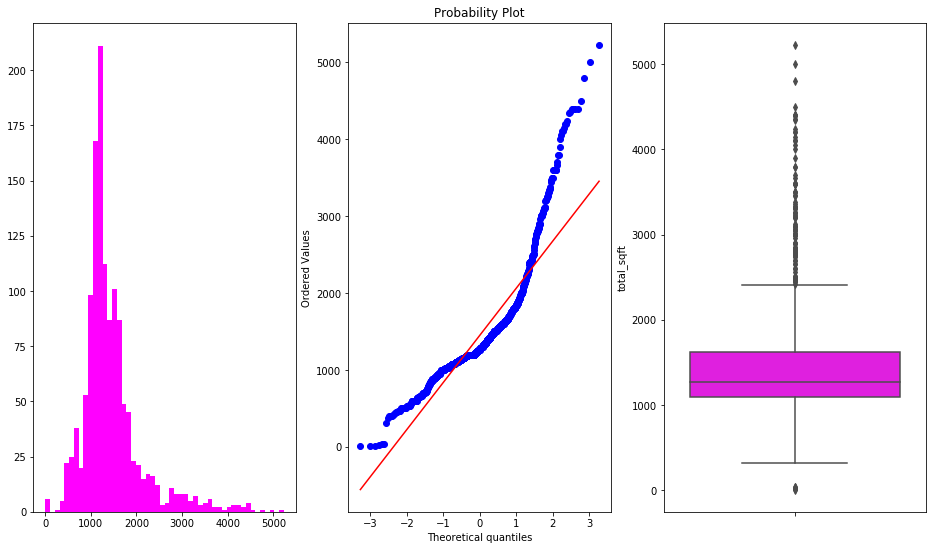

In [101]:
plots(data,'total_sqft')

In [103]:
temp = data.copy()

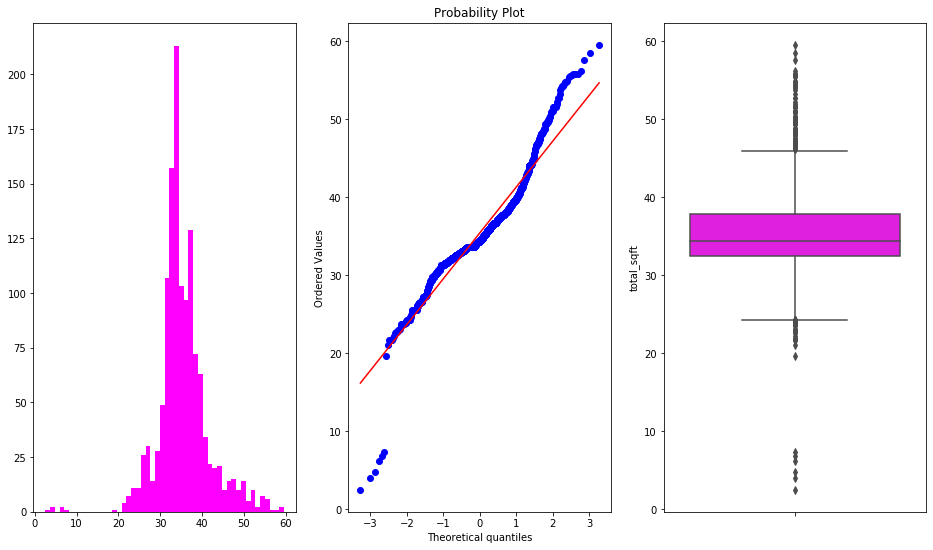

In [104]:
temp['total_sqft'],parameters = stats.boxcox(temp['total_sqft']+1)
plots(temp,'total_sqft')

In [106]:
IQR = temp.total_sqft.quantile(0.75) - temp.total_sqft.quantile(0.25)
IQR

5.430006588677884

In [108]:
upper_bound = (temp['total_sqft'].quantile(0.75) + (IQR*3))
lower_bound = (temp['total_sqft'].quantile(0.25) - (IQR)*3)
print(f' lower bound is {lower_bound}\n upper_bound is {upper_bound}')

 lower bound is 16.139779195994926
 upper_bound is 54.14982531674011


In [109]:
temp1 = temp.loc[(temp['total_sqft']>lower_bound) & (temp['total_sqft']<upper_bound)]

In [111]:
temp1.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1,5,32.023018
1,78.789,4,120.00,3,2,45.541791
2,61.279,3,62.00,3,5,36.184003
3,87.323,3,95.00,1,4,36.968372
4,100.393,2,51.00,1,5,33.681098


In [112]:
temp1.shape

(1300, 6)

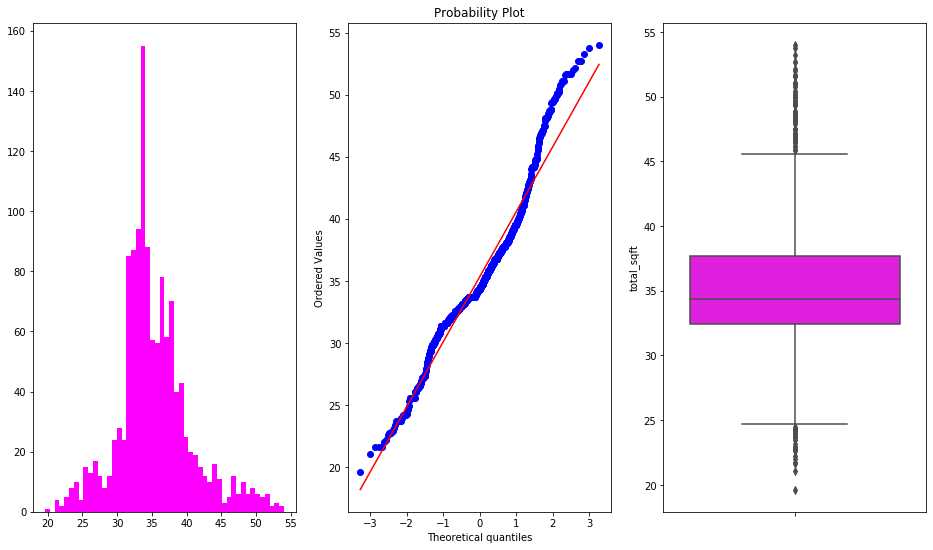

In [113]:
plots(temp1,'total_sqft')

In [102]:
data.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1,5,1056.0
1,78.789,4,120.00,3,2,2600.0
2,61.279,3,62.00,3,5,1440.0
3,87.323,3,95.00,1,4,1521.0
4,100.393,2,51.00,1,5,1200.0


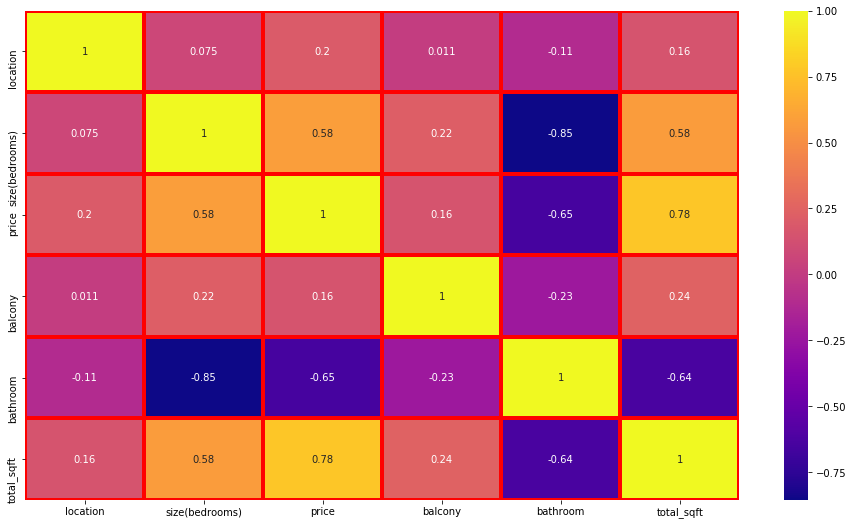

In [115]:
plt.figure(figsize=(16,9))
sn.heatmap(data.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

In [116]:
test = data['price']

train = data.drop(['price'],axis = 1)

In [117]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics

In [119]:
X_train, X_test, y_train, y_test  = train_test_split(train,test,test_size = 0.2)

[Text(605.3717825780234, 480.8048275862069, 'total_sqft <= 2286.0\nmse = 6085.52\nsamples = 1057\nvalue = 94.225'),
 Text(361.149767580177, 463.9344827586207, 'bathroom <= 4.5\nmse = 2146.478\nsamples = 967\nvalue = 77.275'),
 Text(129.84659707993347, 447.0641379310345, 'bathroom <= 3.5\nmse = 3008.793\nsamples = 324\nvalue = 113.685'),
 Text(14.927379950808914, 430.1937931034483, 'total_sqft <= 927.5\nmse = 4260.191\nsamples = 78\nvalue = 151.441'),
 Text(2.7601367045193803, 413.32344827586206, 'bathroom <= 2.0\nmse = 964.328\nsamples = 7\nvalue = 92.129'),
 Text(1.8400911363462535, 396.4531034482759, 'mse = 0.0\nsamples = 1\nvalue = 160.0'),
 Text(3.680182272692507, 396.4531034482759, 'total_sqft <= 882.5\nmse = 229.335\nsamples = 6\nvalue = 80.817'),
 Text(2.7601367045193803, 379.5827586206897, 'balcony <= 2.5\nmse = 114.0\nsamples = 5\nvalue = 86.0'),
 Text(1.8400911363462535, 362.71241379310345, 'size(bedrooms) <= 3.5\nmse = 4.688\nsamples = 4\nvalue = 91.25'),
 Text(0.92004556817

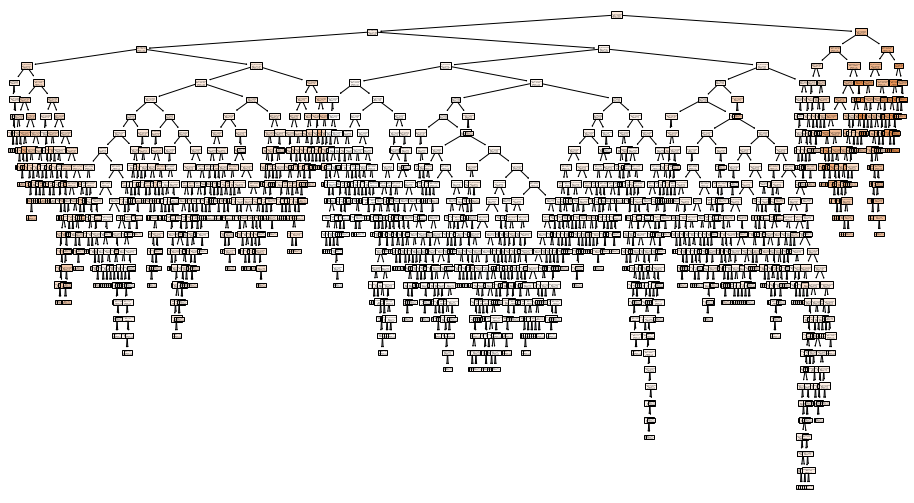

In [121]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=['price'])

In [122]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.00000000e+00, 4.73036897e-06, 7.99432356e-06, 9.08230842e-06,
       2.08609272e-05, 4.25733207e-05, 4.59791864e-05, 8.34437086e-05,
       1.18259224e-04, 1.18259224e-04, 1.18259224e-04, 1.43093661e-04,
       1.90791548e-04, 2.18732261e-04, 2.38457900e-04, 2.80463576e-04,
       2.95222327e-04, 3.54777673e-04, 3.62168874e-04, 3.83159886e-04,
       4.35950804e-04, 4.55692211e-04, 4.63623463e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 5.11636708e-04, 5.72374645e-04,
       6.09377956e-04, 6.30715862e-04, 6.30715863e-04, 6.30715863e-04,
       6.30715863e-04, 6.36518448e-04, 7.39120151e-04, 9.13954588e-04,
       9.94560076e-04, 9.94560076e-04, 1.06433302e-03, 1.06433302e-03,
      

In [123]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

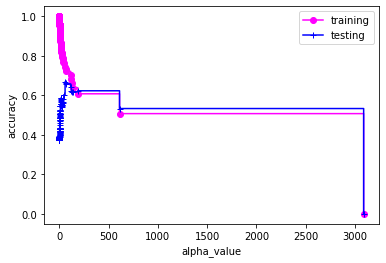

In [124]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alphas,train_score,label = 'training',color = 'magenta',drawstyle = 'steps-post',marker = 'o')
plt.plot(ccp_alphas,test_score,label = 'testing',color = 'blue',drawstyle = 'steps-post',marker = '+')
plt.legend()
plt.show()

In [125]:
alpha_list

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.730368968022369e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=7.994323556628955e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=9.08230842078849e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.086092715020049e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.25733207186547e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.597918637725705e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.3443708608546e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00011825922421948912, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00011825922421948912, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00011825922421948912, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00014309366130418793, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00019079154840726892, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00021873226111652954, random_state=0),
 Decision

[Text(535.6800000000001, 407.7, 'total_sqft <= 2286.0\nmse = 6085.52\nsamples = 1057\nvalue = 94.225'),
 Text(357.12, 244.62, 'bathroom <= 4.5\nmse = 2146.478\nsamples = 967\nvalue = 77.275'),
 Text(178.56, 81.53999999999996, 'mse = 3008.793\nsamples = 324\nvalue = 113.685'),
 Text(535.6800000000001, 81.53999999999996, 'mse = 707.36\nsamples = 643\nvalue = 58.928'),
 Text(714.24, 244.62, 'mse = 12153.87\nsamples = 90\nvalue = 276.344')]

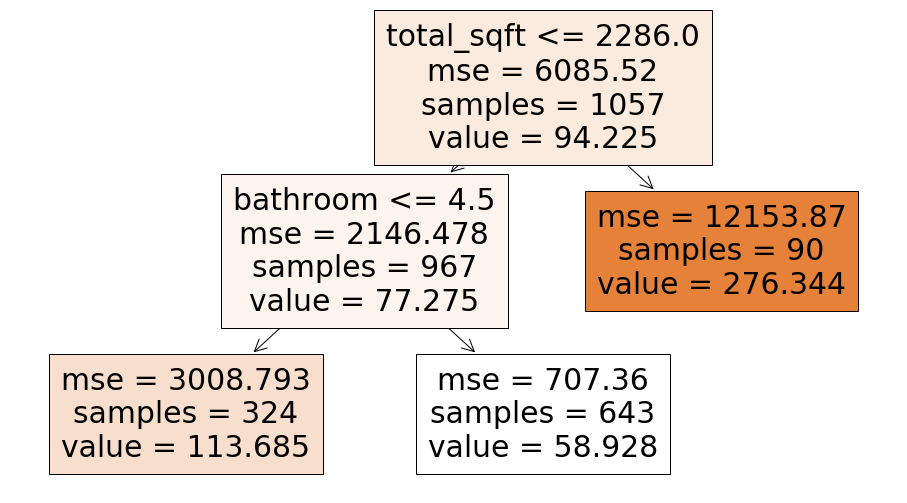

In [129]:
clf = DecisionTreeRegressor(random_state=0,ccp_alpha=200)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=['price'])

In [130]:
params = {
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=10)],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[int(x) for x in np.linspace(50,500,10)],
        }
    },
    'DecisionTree':{
        'model':DecisionTreeRegressor(),
        'params':{
            #'criterion':['gini','entropy'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[int(x) for x in np.linspace(50,500,10)],
            'splitter':['best','random'],
        }
    },
    'Gradientboost':{
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=10)],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[int(x) for x in np.linspace(50,500,10)],
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'tol':[1e-10,1e-5,1e-4,0.05,0.25,0.50,0.75],
            'alpha':[0.5,0.6,0.9,1.0,1.5,2.0,2.5,3.0],
            'learning_rate':[0.25,0.50,0.75,1.0],
        }
    },
}

In [131]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter = 10,scoring = 'neg_mean_squared_error',verbose = 2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500, total=   2.2s
[CV] n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500, total=   2.3s
[CV] n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500 
[CV]  n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500, total=   2.2s
[CV] n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500 
[CV]  n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500, total=   2.2s
[CV] n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500 
[CV]  n_estimators=588, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, max_depth=30, ccp_alpha=500, total=   2.2s
[CV] n_estimators=344, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, ccp_alpha=400 
[CV]  n_estimators=344, min_samples

[CV]  n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50, total=   2.5s
[CV] n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50 
[CV]  n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50, total=   2.9s
[CV] n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50 
[CV]  n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50, total=   2.4s
[CV] n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50 
[CV]  n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, ccp_alpha=50, total=   2.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=1, ccp_alpha=500 
[CV]  n_estimators=1200, min_samples_split=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=2, max_depth=22, ccp_alpha=100 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] splitter=random, min_samples_split=5, min_samples_leaf=5, max_depth=15, ccp_alpha=50 
[CV]  splitter=random, min_samples_split=5, min_samples_leaf=5, max_depth=15, ccp_alpha=50, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=12, max_depth=8, ccp_alpha=500, total=   0.0s
[CV] splitter=best, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6, total=   2.0s
[CV] tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6, total=   2.6s
[CV] tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6 
[CV]  tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6, total=   1.5s
[CV] tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6 
[CV]  tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=30, loss=quantile, learning_rate=1.0, ccp_alpha=200, alpha=0.6, total=   2.0s
[CV] tol=0.0001, n_estimators=833, min_samples_split=10, min_samples_leaf=10, max_features=log2, max

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\ensemble\_gb.py", line 266, in _check_params
    "was %r" % self.alpha)
ValueError: alpha must be in (0.0, 1.0) but was 1.0

  FitFailedWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV]  tol=0.0001, n_estimators=833, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=30, loss=lad, learning_rate=0.5, ccp_alpha=500, alpha=0.5, total=   1.8s
[CV] tol=0.0001, n_estimators=833, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=30, loss=lad, learning_rate=0.5, ccp_alpha=500, alpha=0.5 
[CV]  tol=0.0001, n_estimators=833, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=30, loss=lad, learning_rate=0.5, ccp_alpha=500, alpha=0.5, total=   1.8s
[CV] tol=0.0001, n_estimators=833, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=30, loss=lad, learning_rate=0.5, ccp_alpha=500, alpha=0.5 
[CV]  tol=0.0001, n_estimators=833, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=30, loss=lad, learning_rate=0.5, ccp_alpha=500, alpha=0.5, total=   1.8s
[CV] tol=0.0001, n_estimators=833, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=30, loss=lad, lear

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\ensemble\_gb.py", line 266, in _check_params
    "was %r" % self.alpha)
ValueError: alpha must be in (0.0, 1.0) but was 2.0

  FitFailedWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV]  tol=1e-05, n_estimators=344, min_samples_split=2, min_samples_leaf=12, max_features=log2, max_depth=15, loss=ls, learning_rate=0.5, ccp_alpha=400, alpha=0.6, total=   0.7s
[CV] tol=1e-05, n_estimators=344, min_samples_split=2, min_samples_leaf=12, max_features=log2, max_depth=15, loss=ls, learning_rate=0.5, ccp_alpha=400, alpha=0.6 
[CV]  tol=1e-05, n_estimators=344, min_samples_split=2, min_samples_leaf=12, max_features=log2, max_depth=15, loss=ls, learning_rate=0.5, ccp_alpha=400, alpha=0.6, total=   0.7s
[CV] tol=1e-05, n_estimators=344, min_samples_split=2, min_samples_leaf=12, max_features=log2, max_depth=15, loss=ls, learning_rate=0.5, ccp_alpha=400, alpha=0.6 
[CV]  tol=1e-05, n_estimators=344, min_samples_split=2, min_samples_leaf=12, max_features=log2, max_depth=15, loss=ls, learning_rate=0.5, ccp_alpha=400, alpha=0.6, total=   0.7s
[CV] tol=1e-05, n_estimators=344, min_samples_split=2, min_samples_leaf=12, max_features=log2, max_depth=15, loss=ls, learning_rate=0.5, ccp

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\ensemble\_gb.py", line 266, in _check_params
    "was %r" % self.alpha)
ValueError: alpha must be in (0.0, 1.0) but was 1.0

  FitFailedWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test

In [132]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-1849.678157,"(DecisionTreeRegressor(ccp_alpha=50, max_depth..."
1,DecisionTree,-2085.794256,"DecisionTreeRegressor(ccp_alpha=100, max_depth..."
2,Gradientboost,-2480.862393,"([DecisionTreeRegressor(ccp_alpha=400, criteri..."


In [133]:
for i in scores_df['best_estimator']:
    print(i)
    print('='*100)

RandomForestRegressor(ccp_alpha=50, max_depth=15, min_samples_leaf=10,
                      n_estimators=588)
DecisionTreeRegressor(ccp_alpha=100, max_depth=22, min_samples_leaf=2,
                      min_samples_split=10)
GradientBoostingRegressor(alpha=0.6, ccp_alpha=400, learning_rate=0.5,
                          max_depth=15, max_features='log2',
                          min_samples_leaf=12, n_estimators=344, tol=1e-05)


In [134]:
rf = RandomForestRegressor(ccp_alpha=50, max_depth=15, min_samples_leaf=10,
                      n_estimators=588)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7409768553111595

In [135]:
gb = GradientBoostingRegressor(alpha=0.6, ccp_alpha=400, learning_rate=0.5,
                          max_depth=15, max_features='log2',
                          min_samples_leaf=12, n_estimators=344, tol=1e-05)
gb.fit(X_train,y_train)
gb.score(X_train,y_train)

0.6178099038918832

In [136]:
dt = DecisionTreeRegressor(ccp_alpha=100, max_depth=22, min_samples_leaf=2,
                      min_samples_split=10)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

0.721351113612605

In [138]:
rf.score(X_test,y_test)

0.6724137778777193

### LINEAR MODELS

In [139]:
param_linear = {
    'Linearreg':{
        'model': LinearRegression(),
        'params':{},
    },
    'Lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[0.25,0.50,0.75,1.0,1.5,2.0],
            'max_iter':[int(x) for x in np.linspace(100,1500,10)],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.05,0.25,0.50],
            'selection':['cyclic', 'random'],
        }
    },
    'SVR':{
        'model':SVR(gamma = 'auto'),
        'params':{
            'kernel':['rbf','linear','poly','sigmoid'],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.05,0.25,0.50],
            'C':[0.005,0.025,0.25,0.50,0.75,1.0],
            'max_iter':[int(x) for x in np.linspace(1,250,5)],
        }
    },
    'Ridge':{
        'model':Ridge(),
        'params':{
            'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'alpha':[0.25,0.50,0.75,1.0,1.5,2.0],
            'max_iter':[int(x) for x in np.linspace(100,1500,10)],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.05,0.25,0.50],
        }
    }
}

In [140]:
scores_linear = []
for model_name,mp in param_linear.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter = 10,scoring = 'neg_mean_squared_error',verbose = 2)
    clf.fit(X_train,y_train)
    scores_linear.append({
        'model_name':model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] tol=0.5, selection=random, max_iter=100, alpha=2.0 ..............
[CV]  tol=0.5, selection=random, max_iter=100, alpha=2.0, total=   0.0s
[CV] tol=0.5, selection=ran

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergen

[CV] .... tol=0.001, max_iter=1, kernel=linear, C=0.025, total=   0.0s
[CV] tol=0.001, max_iter=1, kernel=linear, C=0.025 ...................
[CV] .... tol=0.001, max_iter=1, kernel=linear, C=0.025, total=   0.0s
[CV] tol=0.5, max_iter=63, kernel=rbf, C=0.025 .......................
[CV] ........ tol=0.5, max_iter=63, kernel=rbf, C=0.025, total=   0.0s
[CV] tol=0.5, max_iter=63, kernel=rbf, C=0.025 .......................
[CV] ........ tol=0.5, max_iter=63, kernel=rbf, C=0.025, total=   0.0s
[CV] tol=0.5, max_iter=63, kernel=rbf, C=0.025 .......................
[CV] ........ tol=0.5, max_iter=63, kernel=rbf, C=0.025, total=   0.0s
[CV] tol=0.5, max_iter=63, kernel=rbf, C=0.025 .......................
[CV] ........ tol=0.5, max_iter=63, kernel=rbf, C=0.025, total=   0.0s
[CV] tol=0.5, max_iter=63, kernel=rbf, C=0.025 .......................
[CV] ........ tol=0.5, max_iter=63, kernel=rbf, C=0.025, total=   0.0s
[CV] tol=1e-05, max_iter=125, kernel=linear, C=1.0 ...................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % 

[CV] .... tol=1e-05, max_iter=125, kernel=linear, C=1.0, total=   0.0s
[CV] tol=1e-05, max_iter=125, kernel=linear, C=1.0 ...................
[CV] .... tol=1e-05, max_iter=125, kernel=linear, C=1.0, total=   0.0s
[CV] tol=1e-05, max_iter=125, kernel=linear, C=1.0 ...................
[CV] .... tol=1e-05, max_iter=125, kernel=linear, C=1.0, total=   0.0s
[CV] tol=1e-05, max_iter=125, kernel=linear, C=1.0 ...................
[CV] .... tol=1e-05, max_iter=125, kernel=linear, C=1.0, total=   0.0s
[CV] tol=1e-05, max_iter=125, kernel=linear, C=1.0 ...................
[CV] .... tol=1e-05, max_iter=125, kernel=linear, C=1.0, total=   0.0s
[CV] tol=0.05, max_iter=125, kernel=poly, C=0.5 ......................
[CV] ....... tol=0.05, max_iter=125, kernel=poly, C=0.5, total=   0.0s
[CV] tol=0.05, max_iter=125, kernel=poly, C=0.5 ......................
[CV] ....... tol=0.05, max_iter=125, kernel=poly, C=0.5, total=   0.0s
[CV] tol=0.05, max_iter=125, kernel=poly, C=0.5 ......................
[CV] .

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV] .. tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75, total=   0.0s
[CV] tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75 .................
[CV] .. tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75, total=   0.0s
[CV] tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75 .................
[CV] .. tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75, total=   0.0s
[CV] tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75 .................
[CV] .. tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75, total=   0.0s
[CV] tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75 .................
[CV] .. tol=1e-05, max_iter=250, kernel=sigmoid, C=0.75, total=   0.0s
[CV] tol=0.001, max_iter=250, kernel=rbf, C=1.0 ......................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... tol=0.001, max_iter=250, kernel=rbf, C=1.0, total=   0.1s
[CV] tol=0.001, max_iter=250, kernel=rbf, C=1.0 ......................
[CV] ....... tol=0.001, max_iter=250, kernel=rbf, C=1.0, total=   0.1s
[CV] tol=0.001, max_iter=250, kernel=rbf, C=1.0 ......................
[CV] ....... tol=0.001, max_iter=250, kernel=rbf, C=1.0, total=   0.1s
[CV] tol=0.001, max_iter=250, kernel=rbf, C=1.0 ......................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV] ....... tol=0.001, max_iter=250, kernel=rbf, C=1.0, total=   0.1s
[CV] tol=0.001, max_iter=250, kernel=rbf, C=1.0 ......................
[CV] ....... tol=0.001, max_iter=250, kernel=rbf, C=1.0, total=   0.1s
[CV] tol=1e-05, max_iter=63, kernel=poly, C=0.25 .....................
[CV] ...... tol=1e-05, max_iter=63, kernel=poly, C=0.25, total=   0.0s
[CV] tol=1e-05, max_iter=63, kernel=poly, C=0.25 .....................
[CV] ...... tol=1e-05, max_iter=63, kernel=poly, C=0.25, total=   0.0s
[CV] tol=1e-05, max_iter=63, kernel=poly, C=0.25 .....................
[CV] ...... tol=1e-05, max_iter=63, kernel=poly, C=0.25, total=   0.0s
[CV] tol=1e-05, max_iter=63, kernel=poly, C=0.25 .....................
[CV] ...... tol=1e-05, max_iter=63, kernel=poly, C=0.25, total=   0.0s
[CV] tol=1e-05, max_iter=63, kernel=poly, C=0.25 .....................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


[CV] ...... tol=1e-05, max_iter=63, kernel=poly, C=0.25, total=   0.0s
[CV] tol=0.0001, max_iter=250, kernel=poly, C=0.025 ..................
[CV] ... tol=0.0001, max_iter=250, kernel=poly, C=0.025, total=   0.0s
[CV] tol=0.0001, max_iter=250, kernel=poly, C=0.025 ..................
[CV] ... tol=0.0001, max_iter=250, kernel=poly, C=0.025, total=   0.0s
[CV] tol=0.0001, max_iter=250, kernel=poly, C=0.025 ..................
[CV] ... tol=0.0001, max_iter=250, kernel=poly, C=0.025, total=   0.0s
[CV] tol=0.0001, max_iter=250, kernel=poly, C=0.025 ..................
[CV] ... tol=0.0001, max_iter=250, kernel=poly, C=0.025, total=   0.0s
[CV] tol=0.0001, max_iter=250, kernel=poly, C=0.025 ..................
[CV] ... tol=0.0001, max_iter=250, kernel=poly, C=0.025, total=   0.0s
[CV] tol=0.25, max_iter=125, kernel=poly, C=0.75 .....................
[CV] ...... tol=0.25, max_iter=125, kernel=poly, C=0.75, total=   0.0s
[CV] tol=0.25, max_iter=125, kernel=poly, C=0.75 .....................
[CV] .

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  

[CV] . tol=1e-05, solver=svd, max_iter=1188, alpha=0.75, total=   0.0s
[CV] tol=1e-05, solver=svd, max_iter=1188, alpha=0.75 ................
[CV] . tol=1e-05, solver=svd, max_iter=1188, alpha=0.75, total=   0.0s
[CV] tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0 .............
[CV]  tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0, total=   0.0s
[CV] tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0 .............
[CV]  tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0, total=   0.0s
[CV] tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0 .............
[CV]  tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0, total=   0.0s
[CV] tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0 .............
[CV]  tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0, total=   0.0s
[CV] tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0 .............
[CV]  tol=1e-10, solver=cholesky, max_iter=255, alpha=1.0, total=   0.0s
[CV] tol=0.05, solver=sparse_cg, max_iter=877, alpha=0.75 .........

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  tol=0.0001, solver=saga, max_iter=1500, alpha=0.5, total=   0.3s
[CV] tol=0.0001, solver=saga, max_iter=1500, alpha=0.5 ...............


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  tol=0.0001, solver=saga, max_iter=1500, alpha=0.5, total=   0.3s
[CV] tol=0.0001, solver=saga, max_iter=1500, alpha=0.5 ...............


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  tol=0.0001, solver=saga, max_iter=1500, alpha=0.5, total=   0.3s
[CV] tol=0.0001, solver=saga, max_iter=1500, alpha=0.5 ...............


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  tol=0.0001, solver=saga, max_iter=1500, alpha=0.5, total=   0.3s
[CV] tol=0.0001, solver=saga, max_iter=1500, alpha=0.5 ...............


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  tol=0.0001, solver=saga, max_iter=1500, alpha=0.5, total=   0.3s
[CV] tol=1e-05, solver=svd, max_iter=566, alpha=0.75 .................
[CV] .. tol=1e-05, solver=svd, max_iter=566, alpha=0.75, total=   0.0s
[CV] tol=1e-05, solver=svd, max_iter=566, alpha=0.75 .................
[CV] .. tol=1e-05, solver=svd, max_iter=566, alpha=0.75, total=   0.0s
[CV] tol=1e-05, solver=svd, max_iter=566, alpha=0.75 .................
[CV] .. tol=1e-05, solver=svd, max_iter=566, alpha=0.75, total=   0.0s
[CV] tol=1e-05, solver=svd, max_iter=566, alpha=0.75 .................
[CV] .. tol=1e-05, solver=svd, max_iter=566, alpha=0.75, total=   0.0s
[CV] tol=1e-05, solver=svd, max_iter=566, alpha=0.75 .................
[CV] .. tol=1e-05, solver=svd, max_iter=566, alpha=0.75, total=   0.0s
[CV] tol=1e-05, solver=saga, max_iter=877, alpha=0.25 ................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] . tol=1e-05, solver=saga, max_iter=877, alpha=0.25, total=   0.2s
[CV] tol=1e-05, solver=saga, max_iter=877, alpha=0.25 ................
[CV] . tol=1e-05, solver=saga, max_iter=877, alpha=0.25, total=   0.2s
[CV] tol=1e-05, solver=saga, max_iter=877, alpha=0.25 ................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] . tol=1e-05, solver=saga, max_iter=877, alpha=0.25, total=   0.2s
[CV] tol=1e-05, solver=saga, max_iter=877, alpha=0.25 ................
[CV] . tol=1e-05, solver=saga, max_iter=877, alpha=0.25, total=   0.2s
[CV] tol=1e-05, solver=saga, max_iter=877, alpha=0.25 ................
[CV] . tol=1e-05, solver=saga, max_iter=877, alpha=0.25, total=   0.2s
[CV] tol=0.25, solver=sag, max_iter=1500, alpha=0.5 ..................
[CV] ... tol=0.25, solver=sag, max_iter=1500, alpha=0.5, total=   0.0s
[CV] tol=0.25, solver=sag, max_iter=1500, alpha=0.5 ..................
[CV] ... tol=0.25, solver=sag, max_iter=1500, alpha=0.5, total=   0.0s
[CV] tol=0.25, solver=sag, max_iter=1500, alpha=0.5 ..................
[CV] ... tol=0.25, solver=sag, max_iter=1500, alpha=0.5, total=   0.0s
[CV] tol=0.25, solver=sag, max_iter=1500, alpha=0.5 ..................
[CV] ... tol=0.25, solver=sag, max_iter=1500, alpha=0.5, total=   0.0s
[CV] tol=0.25, solver=sag, max_iter=1500, alpha=0.5 ..................
[CV] .

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.8s finished


In [141]:
scores_linear = pd.DataFrame(scores_linear,columns=['model_name','best_score','best_estimator'])
scores_linear

,model_name,best_score,best_estimator
0,Linearreg,-2112.860418,LinearRegression()
1,Lasso,-2110.264546,"Lasso(alpha=0.5, max_iter=100, tol=0.5)"
2,SVR,-6496.851986,"SVR(C=0.75, gamma='auto', kernel='sigmoid', ma..."
3,Ridge,-2112.641047,"Ridge(max_iter=255, solver='cholesky', tol=1e-10)"


In [142]:
for i in scores_linear['best_estimator']:
    print(i)
    print('='*75)

LinearRegression()
Lasso(alpha=0.5, max_iter=100, tol=0.5)
SVR(C=0.75, gamma='auto', kernel='sigmoid', max_iter=250, tol=1e-05)
Ridge(max_iter=255, solver='cholesky', tol=1e-10)


In [143]:
ridge = Ridge(max_iter=255, solver='cholesky', tol=1e-10)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.6616353883212533

In [144]:
lasso = Lasso(alpha=0.5, max_iter=100, tol=0.5)
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.6609607785525023

In [145]:
params_xgb = {
    'n_estimator' : [int(x) for x in np.linspace(start=100,stop=1200,num=10)],
    'learning_rate':[1e-3,0.025,0.050,0.25,0.50],
    'booster':['gbtree' , 'gblinear','dart'],
    'gamma': [1e-3,0.025,0.50,1.0,1.5],
    'reg_alpha':[0.25,0.50,0.75,1.0,1.5],
    'reg_lambda':[1,1.5,2,2.5,3],
    'importance_type':["gain",
    "weight", "cover", "total_gain","total_cover"],
}

In [146]:
xgb = RandomizedSearchCV(XGBRegressor(),param_distributions=params_xgb,cv = 5,n_iter=10,scoring='neg_mean_squared_error',
                        verbose = 2)
xgb.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart 
[11:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart, total=   0.2s
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart 
[11:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart, total=   0.3s
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart 
[11:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart, total=   0.2s
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart 
[11:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dart, total=   0.2s
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=344, learning_rate=0.25, importance_type=cover, gamma=0.025, booster=dar

[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=833, learning_rate=0.025, importance_type=weight, gamma=0.001, booster=dart, total=   0.2s
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=833, learning_rate=0.025, importance_type=weight, gamma=0.001, booster=dart 
[11:56:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=833, learning_rate=0.025, importance_type=weight, gamma=0.001, booster=dart, total=   0.2s
[CV] reg_lambda=2, reg_alpha=0.5, n_estimator=833, learning_rate=0.025, importance_type=weight, gamma=0.001, booster=dart 
[11:56:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=2, reg_alpha=0.5, n_estimator=833, learning_rate=0.025, importance_type=weight, gamma=0.001, booster=dart, total=   0.2s
[CV] reg_lambda=1, reg_alpha=0.25, n_estimator=466, learning_rate=0.025, importance_type=total_cover, gamma=

[CV]  reg_lambda=2.5, reg_alpha=1.5, n_estimator=466, learning_rate=0.001, importance_type=weight, gamma=1.0, booster=dart, total=   0.1s
[CV] reg_lambda=3, reg_alpha=0.25, n_estimator=1077, learning_rate=0.05, importance_type=weight, gamma=1.5, booster=dart 
[11:56:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=3, reg_alpha=0.25, n_estimator=1077, learning_rate=0.05, importance_type=weight, gamma=1.5, booster=dart, total=   0.2s
[CV] reg_lambda=3, reg_alpha=0.25, n_estimator=1077, learning_rate=0.05, importance_type=weight, gamma=1.5, booster=dart 
[11:56:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=3, reg_alpha=0.25, n_estimator=1077, learning_rate=0.05, importance_type=weight, gamma=1.5, booster=dart, total=   0.2s
[CV] reg_lambda=3, reg_alpha=0.25, n_estimator=1077, learning_rate=0.05, importance_type=weight, gamma=1.5, boos

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.5s finished


RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'gamma': [0.001, 0.025, 0.5, 1.0, 1.5],
                                        'importance_type': ['gain', 'weight',
                                                            'cover',
                                                            'total_gain',
                                                            'total_cover'],
                                        'learning_rate': [0.001, 0.025, 0.05,
                                                          0.25, 0.5],
                                        'n_estimator': [100, 222, 344, 466, 588,
                                                        711, 833, 955, 1077,
                                                        1200],
                                        'reg_alpha': [0.25, 0.5, 0.7

In [147]:
xgb.best_score_

-1802.7999705699858

In [148]:
xgb.best_estimator_

XGBRegressor(booster='dart', gamma=1.5, importance_type='weight',
             learning_rate=0.05, n_estimator=1077, reg_alpha=0.25,
             reg_lambda=3)

In [149]:
xgb = XGBRegressor(booster='dart', gamma=1.5, importance_type='weight',
             learning_rate=0.05, n_estimator=1077, reg_alpha=0.25,
             reg_lambda=3)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

[11:56:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8028422440834799

In [150]:
xgb.score(X_test,y_test)

0.6575265243459654

In [151]:
rf =  RandomForestRegressor(ccp_alpha=50, max_depth=15, min_samples_leaf=10,
                      n_estimators=588)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7415364788685945

In [162]:
y_pred = rf.predict(X_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)
pred_df = pd.DataFrame(y_pred)
test_df = pd.DataFrame(y_test)
new_df = pd.concat([test_df,pred_df],axis = 1)
new_df.columns = ['actual','predicted']

In [163]:
new_df

,actual,predicted
0,50.490,49.030538
1,55.000,49.030538
2,59.900,50.011883
3,54.000,49.030538
4,45.000,49.030538
5,25.880,49.030538
6,155.000,153.880057
7,74.000,56.175812
8,108.000,155.653398
9,410.000,258.519820


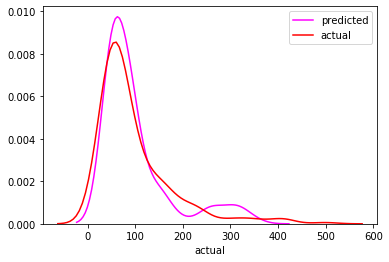

In [164]:
sn.distplot(new_df['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
sn.distplot(new_df['actual'],label='actual',hist = False,kde = True,color='red')
plt.legend()
plt.show()

In [155]:
train_test = np.array(train)
predict = []
for i in range(0,len(train_test)):
    predict.append(rf.predict([train_test[i]]))

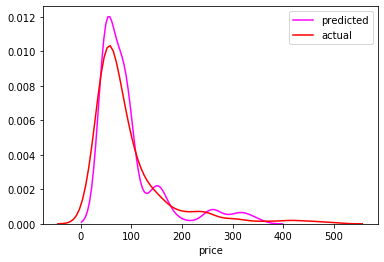

In [157]:
predict = np.array(predict)
data['predicted'] = predict
sn.distplot(data['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
sn.distplot(data['price'],label='actual',hist = False,kde = True,color='red')
plt.legend()
plt.show()

### XGBOOST

In [158]:
xgb = XGBRegressor(booster='dart', gamma=1.5, importance_type='weight',
             learning_rate=0.05, n_estimator=1077, reg_alpha=0.25,
             reg_lambda=3)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

[12:09:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8028422440834799

In [165]:
y_pred = xgb.predict(X_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)
pred_df = pd.DataFrame(y_pred)
test_df = pd.DataFrame(y_test)
new_df1 = pd.concat([test_df,pred_df],axis = 1)
new_df1.columns = ['actual','predicted']

In [166]:
new_df1

,actual,predicted
0,50.490,44.932571
1,55.000,51.999699
2,59.900,60.626316
3,54.000,43.946392
4,45.000,42.682289
5,25.880,51.991451
6,155.000,159.579834
7,74.000,59.882652
8,108.000,141.804962
9,410.000,264.867462


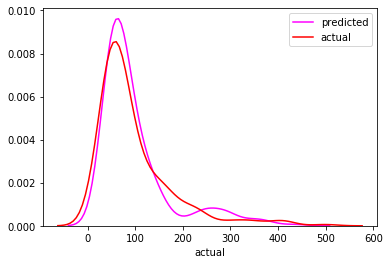

In [167]:
sn.distplot(new_df1['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
sn.distplot(new_df1['actual'],label='actual',hist = False,kde = True,color='red')
plt.legend()
plt.show()

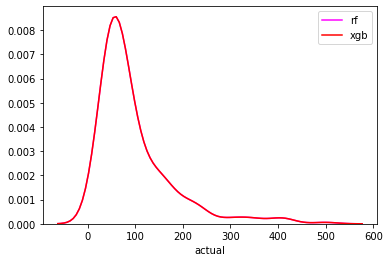

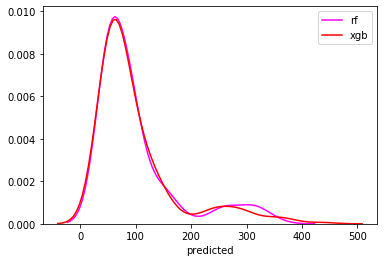

In [168]:
for i,j in zip(new_df.columns,new_df1.columns):
    sn.distplot(new_df[i],hist = False,kde=True,label = 'rf',color = 'magenta')
    sn.distplot(new_df1[j],hist=False,kde=True,label= 'xgb',color = 'red')
    plt.legend()
    plt.show()

In [170]:
import pickle

In [171]:
file = open('hyd_house_rf.pkl','wb')
pickle.dump(rf,file)
file.close()

In [172]:
file1 = open('hyd_house_xgb.pkl','wb')
pickle.dump(xgb,file1)
file1.close()

In [173]:
mean_map

[location
 Addagutta                   172.480000
 Adibatla                     78.789000
 Alkapuri                     61.279000
 Ambedkar Nagar               87.323000
 Ameerpet                    100.393000
 Aminpur                     136.631000
 Anjaiah Nagar               146.334000
 Anjaneya Nagar              140.525000
 Appa Junction               208.375000
 Arunodaya Colony            119.200000
 Attapur                      69.290000
 Ayyappa Society             121.250000
 Bachupally                   78.212000
 Balaji Hills Colony         113.665000
 Bandam Kommu                144.714000
 Bandlaguda                   64.250000
 Bangalore Highway            91.500000
 Banjara Hills               104.603000
 Beeramguda                   99.603000
 Begumpet                    149.155500
 Boduppal                    215.188000
 Bowenpally                   99.250000
 Camelot Layout              129.719000
 Chandanagar                 134.655000
 D.D. Colony                  